In [167]:
# Importing libraries
import pandas as pd
import csv
import matplotlib.pyplot as plt
import scipy.stats as st

east_best8 = "../py_data/east_best8.csv"
west_best8 = "../py_data/west_best8.csv"
game_detail_con = '../py_data/games_details_by_conference.csv'
team_stats = '../Raw_Data/2019-20_TEAMSTATS.csv'
nba_players = '../Raw_Data/2019-2020-player.csv'
nba_games_win = '../Raw_Data/2019-2020-NBA.csv'

east_best8_df = pd.read_csv(east_best8)
west_best8_df = pd.read_csv(west_best8)
game_detail_con_df = pd.read_csv(game_detail_con)
team_stats_df = pd.read_csv(team_stats)
nba_players_df = pd.read_csv(nba_players)
nba_games_win_df = pd.read_csv(nba_games_win)

team_stats_df = team_stats_df.drop(columns = ["Unnamed: 0"])
game_detail_con_df =game_detail_con_df.drop(columns = ["Unnamed: 0"])
game_detail_con_df = game_detail_con_df.drop(columns = ["COMMENT"])
game_detail_con_df = game_detail_con_df.drop(columns = ["START_POSITION"])
nba_players_df = nba_players_df.drop(columns = ["Unnamed: 0"])

In [168]:
p_score = team_stats_df["Points Scored"]
p_against = team_stats_df["Poinst Against"]
point_diff = p_score - p_against

team_stats_df["Points_diff"] = point_diff
team_stats_df.head()

,Abr,Team Name,Conference,Wins,Losses,Win Pct,FG % (2pt),FG% (3pt),Total FG%,Turnovers Committed,Points Scored,Poinst Against,Points_diff
0,ATL,Hawks,East,20,47,0.299,52.5,33.3,44.9,15.7,111.8,119.8,-8.0
1,BOS,Celtics,East,43,21,0.672,51.9,36.3,45.9,13.0,113.0,106.7,6.3
2,BRO,Nets,East,30,34,0.469,51.9,34.0,44.4,14.8,110.8,111.4,-0.6
3,CHA,Hornets,East,23,42,0.354,48.9,35.2,43.4,13.9,102.9,109.6,-6.7
4,CHI,Bulls,East,22,43,0.338,51.1,34.7,44.6,14.6,106.8,109.9,-3.1


R-Squared is 0.47
Correlation is 0.69
P-Value is 2.8821651885047588e-05


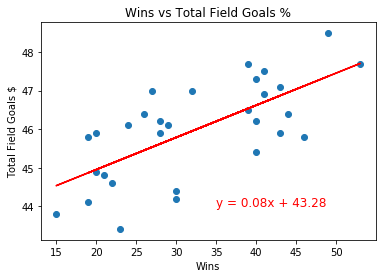

In [312]:
y = team_stats_df["Total FG%"]
x = team_stats_df["Wins"]
plt.scatter(x,y)

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x,y)
s_regress = x*slope + intercept
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"
r_sqr = rvalue**2

# Plotting regression line and equation
plt.plot(x, s_regress, "r-")
plt.annotate(line_eq, (35,44), fontsize = 12, color = "red")
plt.xlabel("Wins")
plt.ylabel("Total Field Goals $")
plt.title("Wins vs Total Field Goals %")

print(f"R-Squared is {round(r_sqr,2)}")
print(f"Correlation is {round(rvalue,2)}")
print(f"P-Value is {pvalue}")

plt.savefig("images/Win_TFG.png")
plt.show()

R-Squared is 0.93
Correlation is 0.96
P-Value is 8.42172987260883e-18


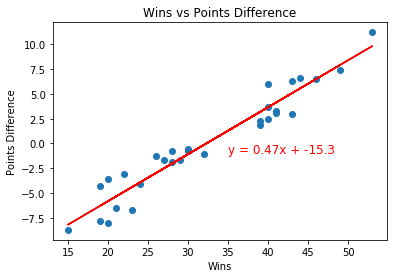

In [314]:
y = team_stats_df["Points_diff"]
x = team_stats_df["Wins"]
plt.scatter(x,y)

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x,y)
s_regress = x*slope + intercept
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"
r_sqr = rvalue**2

# Plotting regression line and equation
plt.plot(x, s_regress, "r-")
plt.annotate(line_eq, (35,-1), fontsize = 12, color = "red")
plt.xlabel("Wins")
plt.ylabel("Points Difference")
plt.title("Wins vs Points Difference")

print(f"R-Squared is {round(r_sqr,2)}")
print(f"Correlation is {round(rvalue,2)}")
print(f"P-Value is {pvalue}")

plt.savefig("images/Win_PD.png")
plt.show()

R-Squared is 0.1
Correlation is -0.32
P-Value is 0.0877933781845457


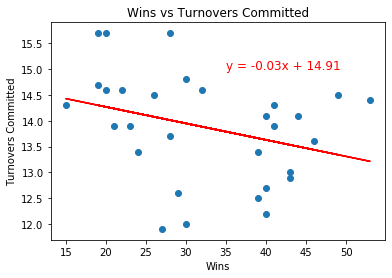

In [315]:
y = team_stats_df["Turnovers Committed"]
x = team_stats_df["Wins"]
plt.scatter(x,y)

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x,y)
s_regress = x*slope + intercept
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"
r_sqr = rvalue**2

# Plotting regression line and equation
plt.plot(x, s_regress, "r-")
plt.annotate(line_eq, (35,15), fontsize = 12, color = "red")
plt.xlabel("Wins")
plt.ylabel("Turnovers Committed")
plt.title("Wins vs Turnovers Committed")

print(f"R-Squared is {round(r_sqr,2)}")
print(f"Correlation is {round(rvalue,2)}")
print(f"P-Value is {pvalue}")

plt.savefig("images/Win_TC.png")
plt.show()

R-Squared is 1.0
Correlation is 1.0
P-Value is 5.603164864998936e-39


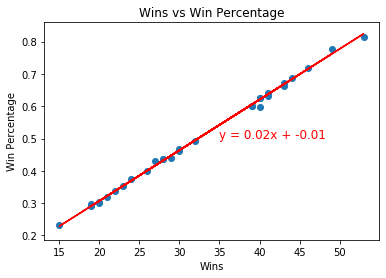

In [316]:
y = team_stats_df["Win Pct"]
x = team_stats_df["Wins"]
plt.scatter(x,y)

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x,y)
s_regress = x*slope + intercept
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"
r_sqr = rvalue**2

# Plotting regression line and equation
plt.plot(x, s_regress, "r-")
plt.annotate(line_eq, (35,.5), fontsize = 12, color = "red")
plt.xlabel("Wins")
plt.ylabel("Win Percentage")
plt.title("Wins vs Win Percentage")

print(f"R-Squared is {round(r_sqr,2)}")
print(f"Correlation is {round(rvalue,2)}")
print(f"P-Value is {pvalue}")

plt.savefig("images/Win_WP.png")
plt.show()

In [304]:
# Code for getting number of players with greater then X amount of point in team
nba_players_df.dropna(inplace = True)
nba_players_df_short = nba_players_df[nba_players_df["Total Points Scored"] > 900]
nba_players_df_short_group = nba_players_df_short.groupby("Team")
nba_s_g = nba_players_df_short_group.count()

# Grouping by NBA players data for mean points calculations
nba_players_df_averagepts = nba_players_df.groupby("Team")
nba_p_m = nba_players_df_averagepts.mean()

# Assigning variables to results 
Abr = nba_s_g["Total Points Scored"].keys()
tps = nba_s_g["Total Points Scored"]
mean_p = nba_p_m["Total Points Scored"]

# Creating new dataframe to merge with team_stats
nba_good_player_count = pd.DataFrame({
    "Abr": Abr,
    "# of Player > 900 pts" : tps,
    "Players Points Average Whole Team" : mean_p
})

nba_good_player_count.reset_index(drop=True, inplace=True)
nba_good_player_count.head()

,Abr,# of Player > 900 pts,Players Points Average Whole Team
0,ATL,1,417.210526
1,BOS,3,425.411765
2,BRO,1,409.000000
3,CHA,2,454.571429
4,CHI,1,408.529412


In [173]:
NBA_merge_df = pd.merge(team_stats_df,nba_good_player_count, on = "Abr")
NBA_merge_df.head()

,Abr,Team Name,Conference,Wins,Losses,Win Pct,FG % (2pt),FG% (3pt),Total FG%,Turnovers Committed,Points Scored,Poinst Against,Points_diff,# of Player > 900 pts,Players Points Average
0,ATL,Hawks,East,20,47,0.299,52.5,33.3,44.9,15.7,111.8,119.8,-8.0,1,417.210526
1,BOS,Celtics,East,43,21,0.672,51.9,36.3,45.9,13.0,113.0,106.7,6.3,3,425.411765
2,BRO,Nets,East,30,34,0.469,51.9,34.0,44.4,14.8,110.8,111.4,-0.6,1,409.000000
3,CHA,Hornets,East,23,42,0.354,48.9,35.2,43.4,13.9,102.9,109.6,-6.7,2,454.571429
4,CHI,Bulls,East,22,43,0.338,51.1,34.7,44.6,14.6,106.8,109.9,-3.1,1,408.529412


R-Squared is 0.28
Correlation is 0.53
P-Value is 0.002610450123550795


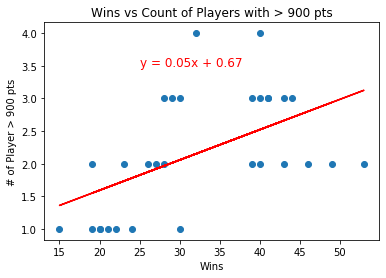

In [317]:
y = NBA_merge_df["# of Player > 900 pts"]
x = NBA_merge_df["Wins"]
plt.scatter(x,y)

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x,y)
s_regress = x*slope + intercept
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"
r_sqr = rvalue**2


# Plotting regression line and equation
plt.plot(x, s_regress, "r-")
plt.annotate(line_eq, (25,3.5), fontsize = 12, color = "red")
plt.xlabel("Wins")
plt.ylabel("# of Player > 900 pts")
plt.title("Wins vs Count of Players with > 900 pts")

print(f"R-Squared is {round(r_sqr,2)}")
print(f"Correlation is {round(rvalue,2)}")
print(f"P-Value is {pvalue}")

plt.savefig("images/Win_GPC.png")
plt.show()

R-Squared is 0.24
Correlation is 0.49
P-Value is 0.005525192482316654


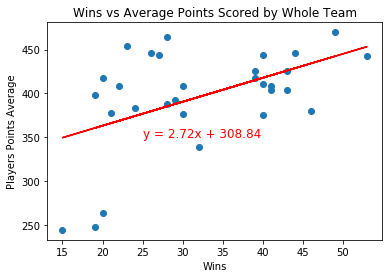

In [320]:
y = NBA_merge_df["Players Points Average"]
x = NBA_merge_df["Wins"]
plt.scatter(x,y)

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x,y)
s_regress = x*slope + intercept
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"
r_sqr = rvalue**2

# Plotting regression line and equation
plt.plot(x, s_regress, "r-")
plt.annotate(line_eq, (25,350), fontsize = 12, color = "red")
plt.xlabel("Wins")
plt.ylabel("Players Points Average")
plt.title("Wins vs Average Points Scored by Whole Team")

print(f"R-Squared is {round(r_sqr,2)}")
print(f"Correlation is {round(rvalue,2)}")
print(f"P-Value is {pvalue}")

plt.savefig("images/Win_APS.png")
plt.show()

In [176]:
# Dropping empty rows and unnecassary columns
game_detail_con_df.dropna(inplace = True)
game_detail_con_df = game_detail_con_df.drop(columns = ["TEAM_ID"])
game_detail_con_df = game_detail_con_df.drop(columns = ["PLAYER_ID"])
game_detail_con_df = game_detail_con_df.drop(columns = ["DREB"])
game_detail_con_df = game_detail_con_df.drop(columns = ["PLUS_MINUS"])
game_detail_con_df = game_detail_con_df.drop(columns = ["FG3A"])
game_detail_con_df = game_detail_con_df.drop(columns = ["FG3M"])
game_detail_con_df = game_detail_con_df.drop(columns = ["FG3_PCT"])

In [177]:
# EFF: efficiency: NBA's efficiency rating: (PTS + REB + AST + STL + BLK − ((FGA − FGM) + (FTA − FTM) + TO))
PTS = game_detail_con_df["PTS"]
REB = game_detail_con_df["REB"]
AST = game_detail_con_df["AST"]
STL = game_detail_con_df["STL"]
BLK = game_detail_con_df["BLK"]
FGA = game_detail_con_df["FGA"]
FGM = game_detail_con_df["FGM"]
FTA = game_detail_con_df["FTA"]
FTM = game_detail_con_df["FTM"]
TO = game_detail_con_df["TO"]

# Calculating Player Efficiency Rating (PER)
game_detail_con_df["PER"] = PTS + REB + AST + STL + BLK - ((FGA - FGM) + (FTA - FTM) + TO)
game_detail_con_df.head()

,GAME_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_NAME,MIN,FGM,FGA,FG_PCT,FTM,FTA,...,OREB,REB,AST,STL,BLK,TO,PF,PTS,Conf,PER
0,21900895,MIL,Milwaukee,Wesley Matthews,27:08,3.0,11.0,0.273,0.0,0.0,...,4.0,8.0,2.0,2.0,0.0,0.0,0.0,8.0,East,12.0
1,21900895,MIL,Milwaukee,Giannis Antetokounmpo,34:55,17.0,28.0,0.607,6.0,7.0,...,2.0,20.0,6.0,1.0,0.0,3.0,2.0,41.0,East,53.0
2,21900895,MIL,Milwaukee,Brook Lopez,26:25,4.0,11.0,0.364,7.0,9.0,...,2.0,7.0,0.0,0.0,3.0,0.0,2.0,16.0,East,17.0
3,21900895,MIL,Milwaukee,Donte DiVincenzo,27:35,1.0,5.0,0.200,0.0,0.0,...,1.0,7.0,5.0,0.0,1.0,2.0,0.0,2.0,East,9.0
4,21900895,MIL,Milwaukee,Eric Bledsoe,22:17,2.0,8.0,0.250,0.0,0.0,...,1.0,1.0,2.0,1.0,0.0,3.0,2.0,4.0,East,-1.0


In [178]:
game_PER = game_detail_con_df.groupby("TEAM_ABBREVIATION")
game_p_m = game_PER.mean()

Abr_per = game_p_m["PER"].keys()
PER = game_p_m["PER"]

nba_PER_df = pd.DataFrame({
    "Abr": Abr_per,
    "PER" : PER
})

nba_PER_df.reset_index(drop=True, inplace=True)
nba_PER_df.head()

,Abr,PER
0,ATL,11.518018
1,BKN,11.527578
2,BOS,11.941176
3,CHA,11.131016
4,CHI,11.274272


In [307]:
NBA_merge_df_PER = pd.merge(NBA_merge_df,nba_PER_df, on = "Abr")
NBA_merge_df_PER.head()

,Abr,Team Name,Conference,Wins,Losses,Win Pct,FG % (2pt),FG% (3pt),Total FG%,Turnovers Committed,Points Scored,Poinst Against,Points_diff,# of Player > 900 pts,Players Points Average,PER
0,ATL,Hawks,East,20,47,0.299,52.5,33.3,44.9,15.7,111.8,119.8,-8.0,1,417.210526,11.518018
1,BOS,Celtics,East,43,21,0.672,51.9,36.3,45.9,13.0,113.0,106.7,6.3,3,425.411765,11.941176
2,CHA,Hornets,East,23,42,0.354,48.9,35.2,43.4,13.9,102.9,109.6,-6.7,2,454.571429,11.131016
3,CHI,Bulls,East,22,43,0.338,51.1,34.7,44.6,14.6,106.8,109.9,-3.1,1,408.529412,11.274272
4,CLE,Cavaliers,East,19,46,0.292,51.9,35.1,45.8,15.7,106.9,114.7,-7.8,2,398.666667,11.272300


R-Squared is 0.33
Correlation is 0.58
P-Value is 0.001281110118201264


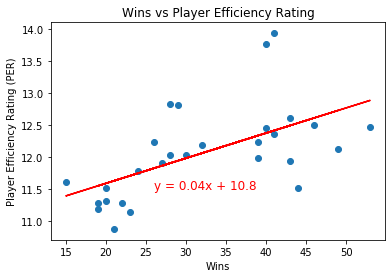

In [319]:
y = NBA_merge_df_PER["PER"]
x = NBA_merge_df_PER["Wins"]
plt.scatter(x,y)

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x,y)
s_regress = x*slope + intercept
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"
r_sqr = rvalue**2

# Plotting regression line and equation
plt.plot(x, s_regress, "r-")
plt.annotate(line_eq, (26,11.5), fontsize = 12, color = "red")
plt.xlabel("Wins")
plt.ylabel("Player Efficiency Rating (PER)")
plt.title("Wins vs Player Efficiency Rating")

print(f"R-Squared is {round(r_sqr,2)}")
print(f"Correlation is {round(rvalue,2)}")
print(f"P-Value is {pvalue}")

plt.savefig("images/Win_PER.png")
plt.show()

In [309]:
# Ignoring "Turnover Commited" regression line as the P.value was greater then .05

# Winning Parameters = .08(Field Goals Total(FGT)) + .47(Points Difference(PD)) 
# + .05(Number of Good Players > 900(NGP)) + 2.72*(Average Points Scored(APS)) + .04(Final Player Efficiency Rating(PER_F)) 

# Final Scores to by multiplied by Home Team Advantage Percentage if final in teams home

FGT = NBA_merge_df_PER["Total FG%"]
PD = NBA_merge_df_PER["Points_diff"]
NGP = NBA_merge_df_PER["# of Player > 900 pts"]
APS = NBA_merge_df_PER["Players Points Average"]
PER_F = NBA_merge_df_PER["PER"]
WPCT = NBA_merge_df_PER["Win Pct"]

win_score = .08*(FGT/100) + .47*(PD) + .05*(NGP) + .04*(PER_F) + 2.72*(APS/1000)
win_score_APS_no = .08*(FGT/100) + .47*(PD) + .05*(NGP) + .04*(PER_F)
win_score_winpct = .08*(FGT/100) + .47*(PD) + .05*(NGP) + .04*(PER_F) + .02*(WPCT)

win_table = NBA_merge_df_PER
win_table['Win Score'] = win_score
win_table['Win Score Without APS'] = win_score_APS_no
win_table['Win Score WPCT'] = win_score_winpct

win_table = win_table[["Abr",'Wins',"Win Score", 'Win Score Without APS', 'Win Score WPCT']]
win_table.head()

,Abr,Wins,Win Score,Win Score Without APS,Win Score WPCT
0,ATL,20,-2.078547,-3.213359,-3.207379
1,BOS,43,4.782487,3.625367,3.638807
2,CHA,23,-1.332605,-2.569039,-2.561959
3,CHI,22,0.190851,-0.920349,-0.913589
4,CLE,19,-1.994095,-3.078468,-3.072628


In [301]:
# Merging data of win score with east conference
merged_east = pd.merge(east_best8_df, win_table)
merged_east[["Abr","Team Name","Win Score"]]

,Abr,Team Name,Win Score
0,MIL,Bucks,7.104875
1,TOR,Raptors,4.725439
2,BOS,Celtics,4.782487
3,MIA,Heat,3.406418
4,IND,Pacers,2.657754
5,PHI,76ers,2.905608
6,ORL,Magic,1.315519


In [302]:
# Merging data of win score with west conference
merged_west = pd.merge(west_best8_df, win_table)
merged_west[["Abr","Team Name","Win Score"]]

,Abr,Team Name,Win Score
0,LAL,Lakers,5.378986
1,LAC,Clippers,4.964211
2,DEN,Nuggets,3.150142
3,UTA,Jazz,3.238462
4,HOU,Rockets,3.447254
5,DAL,Mavericks,4.621212
6,MEM,Grizzlies,1.131875


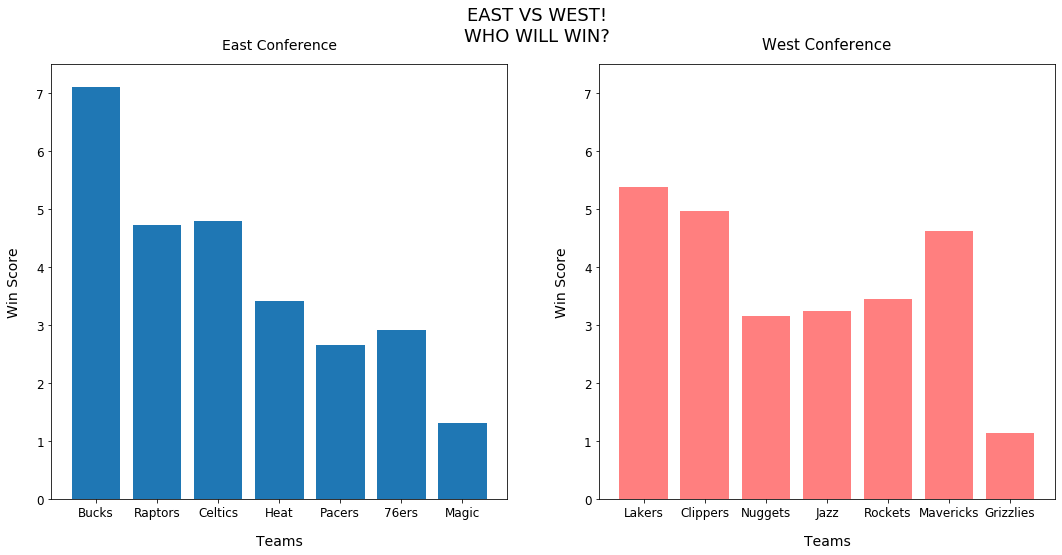

In [321]:
# Defining X and Y variables
x = merged_east["Team Name"]
y = merged_east["Win Score"]
x2 = merged_west["Team Name"]
y2 = merged_west["Win Score"]

# Defining figsize and title
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18,8))
fig.suptitle('EAST VS WEST!\nWHO WILL WIN?', fontsize = 18)

# East conference
ax1.bar(x, y)
ax1.set_ylim([0,7.5])
ax1.set_ylabel("Win Score", fontsize = 14, labelpad=15)
ax1.set_title('East Conference', fontsize = 14, pad = 15)
ax1.set_xlabel("Teams", fontsize = 14, labelpad=15)

# West conference
ax2.bar(x2, y2, color = "red", alpha = .5)
ax2.set_title('West Conference', fontsize = 15, pad = 15)
ax2.set_ylim([0,7.5])
ax2.set_ylabel("Win Score", fontsize = 14, labelpad=15)
ax2.set_xlabel("Teams", fontsize = 14, labelpad=15)

# Increasing size of labels
ax1.tick_params(axis='both', which='major', labelsize=12)
ax2.tick_params(axis='both', which='major', labelsize=12)

# Printing results
plt.savefig("images/Win_team.png")
plt.show()